In [4]:
import pandas as pd

# Load the dataset
file_path = 'sleepDay_merged.csv'
df = pd.read_csv(file_path)

# Show basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [5]:
df

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


Dataset ini berisi data terkait pola tidur pengguna dengan 413 entri dan 5 kolom, yaitu:

*   Id: ID pengguna.
*   SleepDay: Tanggal tidur yang diformat sebagai objek.

*   TotalSleepRecords: Jumlah kali tidur dalam satu hari.
*   TotalMinutesAsleep: Total menit yang dihabiskan untuk tidur.

*   TotalTimeInBed: Total waktu yang dihabiskan di tempat tidur.

In [6]:
# Convert the 'SleepDay' column to datetime format for better analysis
df['SleepDay'] = pd.to_datetime(df['SleepDay'])

# Calculate basic statistics for numeric columns
df.describe()


<ipython-input-6-dd86be970d2f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SleepDay'] = pd.to_datetime(df['SleepDay'])


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


Dari hasil statistik deskriptif, berikut adalah beberapa poin penting:


*   Total Sleep Records: Mayoritas pengguna memiliki 1 kali tidur per hari (median 1), namun ada yang mencapai hingga 3 kali.
*   Total Minutes Asleep: Rata-rata waktu tidur adalah 419 menit (sekitar 7 jam), dengan variasi besar antara pengguna (min 58 menit, max 796 menit).
*   Total Time in Bed: Rata-rata waktu yang dihabiskan di tempat tidur adalah 458 menit (sekitar 7.6 jam), dengan maksimal hingga 961 menit.



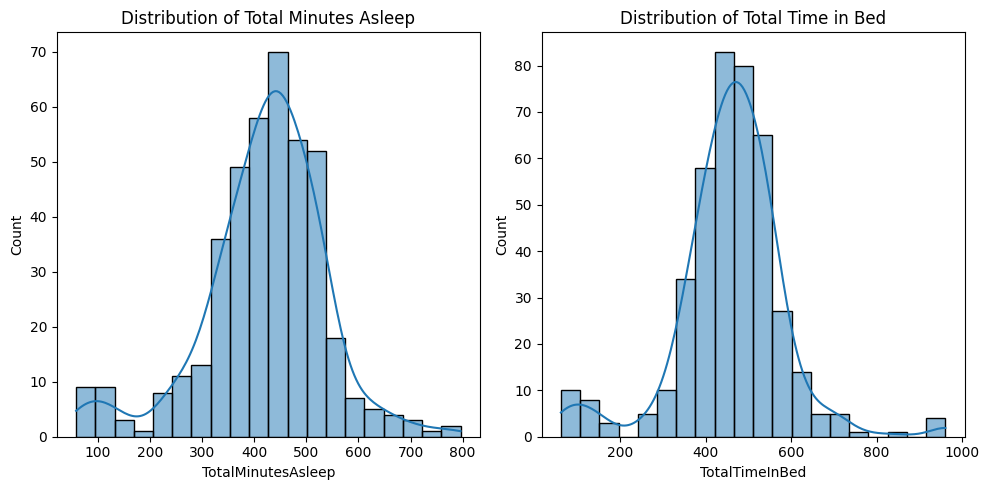

,TotalMinutesAsleep,TotalTimeInBed
TotalMinutesAsleep,1.000000,0.930457
TotalTimeInBed,0.930457,1.000000


In [7]:
# Calculate correlation between TotalTimeInBed and TotalMinutesAsleep
correlation = df[['TotalMinutesAsleep', 'TotalTimeInBed']].corr()

# Plot distributions of TotalMinutesAsleep and TotalTimeInBed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# Distribution plot for TotalMinutesAsleep
plt.subplot(1, 2, 1)
sns.histplot(df['TotalMinutesAsleep'], bins=20, kde=True)
plt.title('Distribution of Total Minutes Asleep')

# Distribution plot for TotalTimeInBed
plt.subplot(1, 2, 2)
sns.histplot(df['TotalTimeInBed'], bins=20, kde=True)
plt.title('Distribution of Total Time in Bed')

plt.tight_layout()
plt.show()

correlation


Hasil EDA menunjukkan:


*   Korelasi tinggi (0.93) antara Total Time in Bed dan
Total Minutes Asleep, menunjukkan bahwa semakin lama seseorang berada di tempat tidur, semakin lama waktu tidurnya.
*   Distribusi waktu tidur dan waktu di tempat tidur menunjukkan bahwa sebagian besar pengguna tidur antara 350 hingga 500 menit (sekitar 6-8 jam), dengan sedikit pengguna yang tidur lebih dari 700 menit.

In [8]:
# Check for missing values in the dataset
df.isnull().sum()


,0
Id,0
SleepDay,0
TotalSleepRecords,0
TotalMinutesAsleep,0
TotalTimeInBed,0
